In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as mpf




In [4]:
assets = ['SPY','IWM','EEM','AGG','HYG','LQD','XLRE','GLD','USO','DBB','FEZ']
end_date = '2023-10-31'
data=yf.download(assets,end=end_date)['Adj Close']
data.head()

[*********************100%%**********************]  11 of 11 completed


,AGG,DBB,EEM,FEZ,GLD,HYG,IWM,LQD,SPY,USO,XLRE
Date,,,,,,,,,,,
1993-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.941399,NaN,NaN
1993-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.118780,NaN,NaN
1993-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.172012,NaN,NaN
1993-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.438086,NaN,NaN
1993-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.544542,NaN,NaN


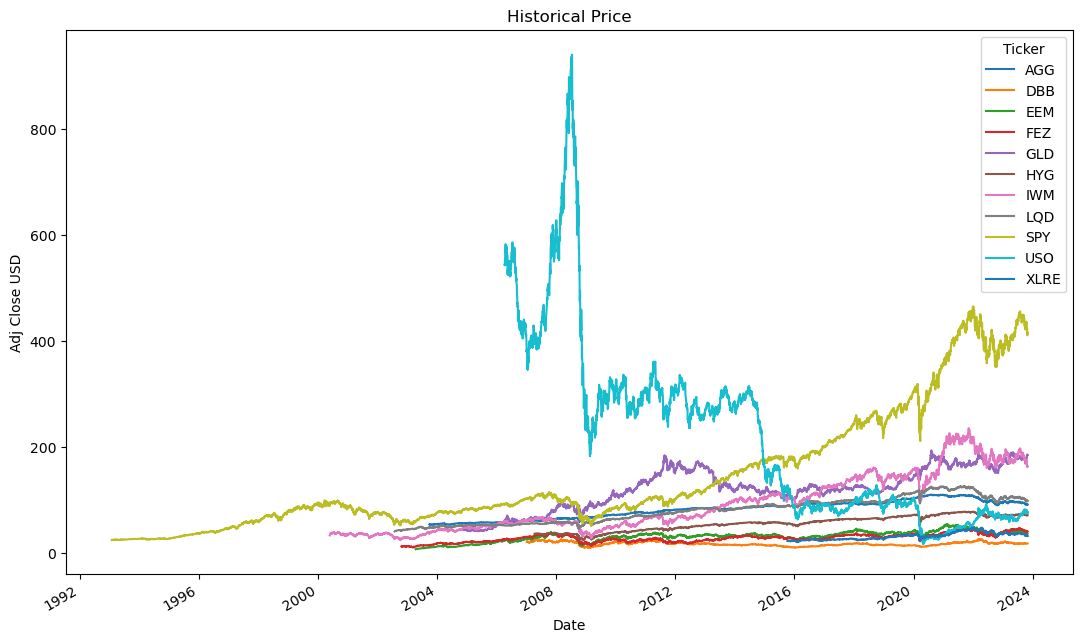

In [5]:
#Explore Data Visually
data.plot(figsize=(13,8))
plt.title('Historical Price')
plt.xlabel('Date')
plt.ylabel('Adj Close USD')
plt.legend(title = 'Ticker')

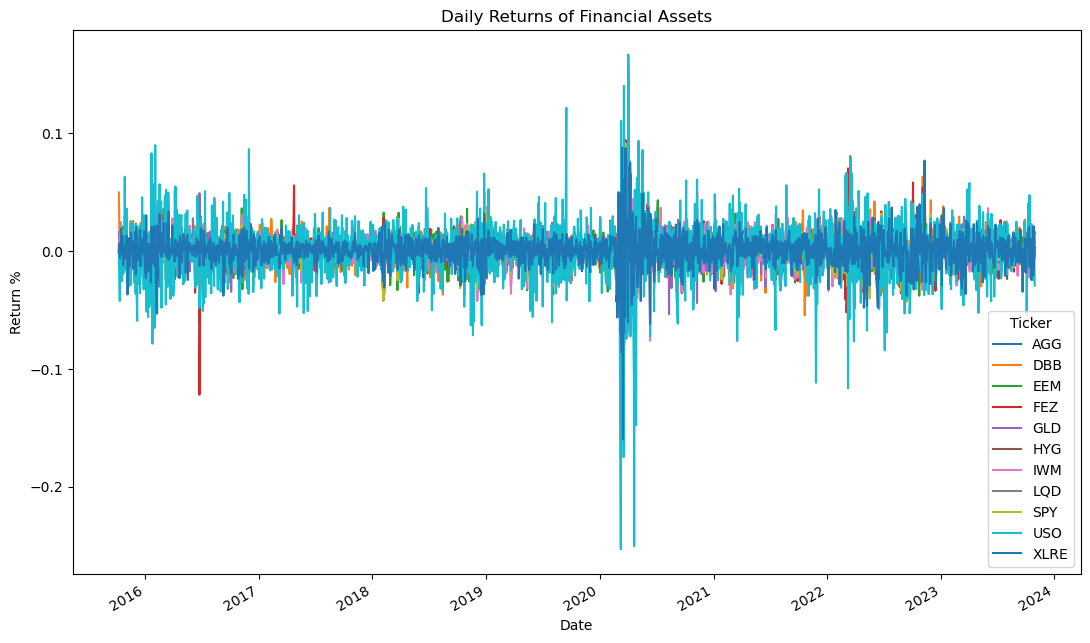

In [6]:
#Calculate Daily Percentage Returns
daily_returns = data.pct_change().dropna()

#plot the daily returns
daily_returns.plot(figsize=(13,8))
plt.title('Daily Returns of Financial Assets')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.legend(title='Ticker')

In [7]:
#Calculate mean returns and covariance matrix
mean_return = daily_returns.mean()
cov_matrix = daily_returns.cov()

print("Mean Returns:\n", mean_return)
print("Covariance Matrix:\n", cov_matrix)

Mean Returns:
 AGG     0.000019
DBB     0.000275
EEM     0.000189
FEZ     0.000275
GLD     0.000300
HYG     0.000139
IWM     0.000330
LQD     0.000064
SPY     0.000496
USO     0.000075
XLRE    0.000262
dtype: float64
Covariance Matrix:
                AGG           DBB       EEM       FEZ       GLD       HYG  \
AGG   1.126140e-05  9.227369e-07  0.000005  0.000006  0.000011  0.000006   
DBB   9.227369e-07  1.401233e-04  0.000061  0.000053  0.000023  0.000018   
EEM   4.916919e-06  6.124848e-05  0.000179  0.000144  0.000016  0.000051   
FEZ   5.626296e-06  5.276905e-05  0.000144  0.000188  0.000010  0.000056   
GLD   1.149362e-05  2.293611e-05  0.000016  0.000010  0.000078  0.000007   
HYG   6.238847e-06  1.815416e-05  0.000051  0.000056  0.000007  0.000033   
IWM   4.563602e-06  5.497937e-05  0.000139  0.000155  0.000003  0.000062   
LQD   1.564769e-05  4.271878e-06  0.000018  0.000022  0.000017  0.000017   
SPY   4.007161e-06  4.169630e-05  0.000118  0.000131  0.000004  0.000052   
USO

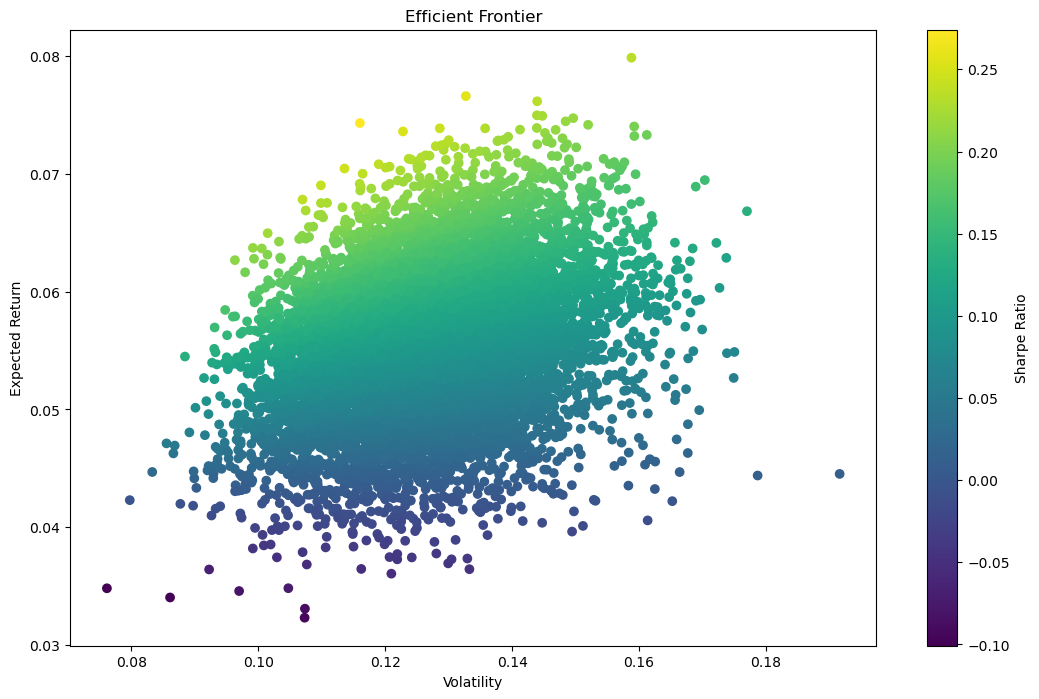

In [13]:
class PortfolioOptimizer:
    def __init__(self, returns, num_portfolios=10000, risk_free_rate = 0.0425):
        self.returns = returns
        self.num_portfolios = num_portfolios
        self.risk_free_rate = risk_free_rate
        self.assets = returns.columns
        self.num_assets = len(self.assets)
        self.portfolio_weights = []
        self.portfolio_expected_returns = []
        self.portfolio_volatilities = []
        self.portfolio_sharpe_ratios = []
        
    def generate_random_portfolios(self):
        np.random.seed(42)
        for _ in range(self.num_portfolios):
            weights = np.random.random(self.num_assets)
            weights /= np.sum(weights)
            self.portfolio_weights.append(weights)
            expected_return = np.sum(weights * self.returns.mean())*252
            self.portfolio_expected_returns.append(expected_return)
            volatility = np.sqrt(np.dot(weights.T,np.dot(self.returns.cov() *252, weights)))
            self.portfolio_volatilities.append(volatility)
            sharpe_ratio = (expected_return - self.risk_free_rate)/volatility
            self.portfolio_sharpe_ratios.append(sharpe_ratio)
            
    def get_portfolio_performance(self,weights):
        weights = np.array(weights)
        expected_return = np.sum(weights * self.returns.mean())*252
        volatility = np.sqrt(np.dot(weights.T, np.dot(self.returns.cov() * 252, weights)))
        sharpe_ratio = (expected_return - self.risk_free_rate)/volatility
        return expected_return, volatility, sharpe_ratio
    
    def plot_efficient_frontier(self):
        portfolios = pd.DataFrame({
            'Return': self.portfolio_expected_returns,
            'Volatility': self.portfolio_volatilities,
            'Sharpe Ratio': self.portfolio_sharpe_ratios
        })
        
        #Efficient Frontier
        plt.figure(figsize=(13,8))
        plt.scatter(portfolios['Volatility'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='viridis')
        plt.colorbar(label = 'Sharpe Ratio')
        plt.xlabel('Volatility')
        plt.ylabel('Expected Return')
        plt.title('Efficient Frontier')
        
        return portfolios
    
# Create an instance of Portfolio Optimizer
optimizer = PortfolioOptimizer(daily_returns)

#Generate Random Portfolios
optimizer.generate_random_portfolios()

# Plot an Efficient Frontier
portfolios = optimizer.plot_efficient_frontier()

In [14]:
#Find the portfolio with the highest sharpe ratio
optimal_idx = np.argmax(optimizer.portfolio_sharpe_ratios)
optimal_return = optimizer.portfolio_expected_returns[optimal_idx]
optimal_volatility = optimizer.portfolio_volatilities[optimal_idx]
optimal_weights= optimizer.portfolio_weights[optimal_idx]

print("Optimal Portfolio Weights:\n", optimal_weights)
print("Expected Annual Return: {:.2f}%".format(optimal_return * 100))
print("Annual Volatility: {:.2f}%".format(optimal_volatility * 100))
print("Sharpe Ratio:", max(optimizer.portfolio_sharpe_ratios))

Optimal Portfolio Weights:
 [0.10485712 0.0765179  0.07340453 0.03009365 0.24650505 0.02613901
 0.08816668 0.01377746 0.23569446 0.01184938 0.09299477]
Expected Annual Return: 7.43%
Annual Volatility: 11.60%
Sharpe Ratio: 0.274130565705194


Text(0.5, 1.0, 'Efficient Frontier with Optimal Portfolio')

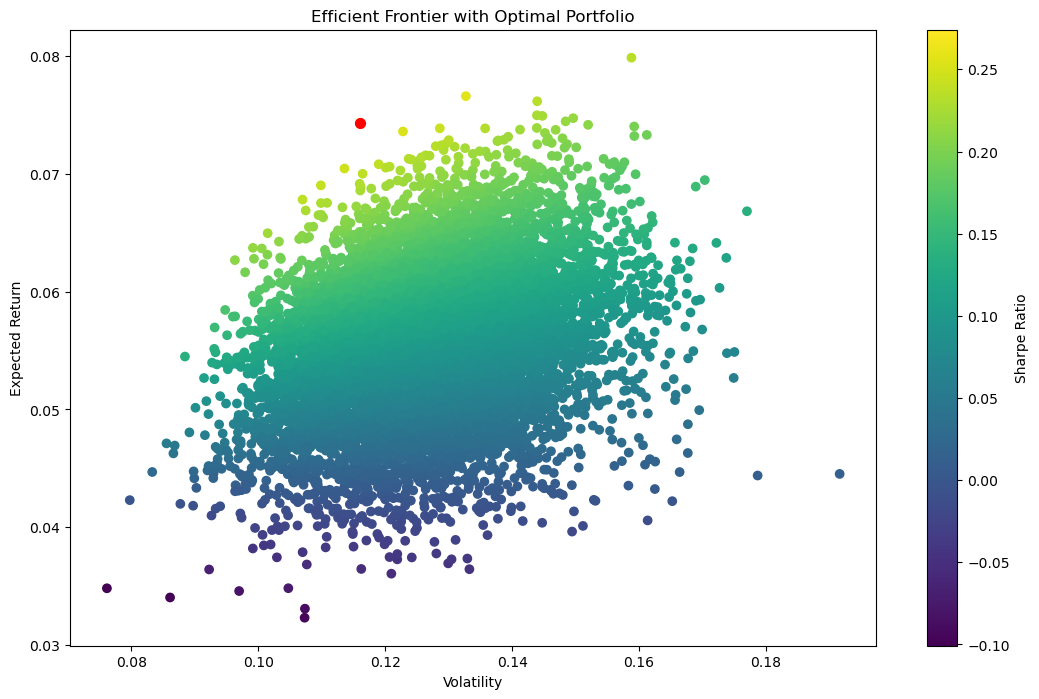

In [16]:
#Efficient Frontier with Optimal Portfolio
plt.figure(figsize=(13,8))
plt.scatter(portfolios['Volatility'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.scatter(optimal_volatility, optimal_return, color='red', s=50) # Red dot
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Optimal Portfolio')